<a href="https://colab.research.google.com/github/tuankiet110301/CS114.L22.KHCL/blob/main/Score_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [166]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


# **Trích xuất dữ liệu và tiền xử lý**

In [167]:
from google.colab import drive
drive.mount('/content/drive')

wecode = pd.read_csv("/content/drive/MyDrive/wecode.csv")
score = pd.read_csv("/content/drive/MyDrive/score_training.csv", encoding= 'unicode_escape')

wecode = wecode.apply(pd.to_numeric, errors='coerce')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [168]:
wecode.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264606 entries, 0 to 264605
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             264606 non-null  int64  
 1   assignment_id  264606 non-null  int64  
 2   problem_id     264606 non-null  int64  
 3   user_id        264606 non-null  int64  
 4   is_final       264606 non-null  int64  
 5   status         0 non-null       float64
 6   pre_score      264606 non-null  int64  
 7   coefficient    264354 non-null  float64
 8   file_name      0 non-null       float64
 9   language_id    264606 non-null  int64  
 10  created_at     0 non-null       float64
 11  updated_at     0 non-null       float64
dtypes: float64(5), int64(7)
memory usage: 24.2 MB


In [169]:
wecode

,id,assignment_id,problem_id,user_id,is_final,status,pre_score,coefficient,file_name,language_id,created_at,updated_at
0,4,0,3,4,1,NaN,10000,100.0,NaN,2,NaN,NaN
1,5,0,4,4,1,NaN,10000,100.0,NaN,2,NaN,NaN
2,6,0,5,4,0,NaN,0,100.0,NaN,2,NaN,NaN
3,7,0,5,4,0,NaN,0,100.0,NaN,2,NaN,NaN
4,8,0,5,4,0,NaN,0,100.0,NaN,2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
264601,266667,0,25,1796,0,NaN,0,100.0,NaN,4,NaN,NaN
264602,266668,0,25,1796,0,NaN,0,100.0,NaN,2,NaN,NaN
264603,266669,0,25,1796,1,NaN,10000,100.0,NaN,4,NaN,NaN
264604,266670,0,150,255,1,NaN,6250,100.0,NaN,2,NaN,NaN


In [170]:
score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      975 non-null    int64 
 1   QT      973 non-null    object
 2   GK      974 non-null    object
 3   TH      974 non-null    object
 4   CK      974 non-null    object
 5   TBM     974 non-null    object
 6   TBTL    974 non-null    object
dtypes: int64(1), object(6)
memory usage: 53.4+ KB


In [171]:
score


,id,QT,GK,TH,CK,TBM,TBTL
0,22,10,9,8.5,8.5,8.8,8.52
1,24,10,8,10,9.5,9.4,8.41
2,27,10,10,10,10,10,8.67
3,28,10,9.5,7.5,9.5,9.2,7.39
4,29,10,9.5,5,8.5,8.2,8.05
...,...,...,...,...,...,...,...
970,1857,5,4.5,10,4,6,6.03
971,1859,8,5,10,1.5,5.4,5.06
972,1862,5,6.5,1,7.5,5.1,4.71
973,1865,6.5,,3,7.5,,6.89


**Xử lý với tập Score training**

In [178]:
#Lấy những feature cần thiết 

#wecode1['user_id'] = pd.DataFrame(score['id'])
#wecode1.drop('id', axis='columns', inplace=True)

score = score.rename(columns={'id': 'user_id'})
mark = score[['user_id', 'TH', 'QT', 'GK']]

wecode1['Final_Score'] = pd.DataFrame(score['CK'])
wecode1 = pd.merge(wecode1, mark, on='user_id', how="outer")

wecode1

,Final_Score,user_id,TH,QT,GK
0,8.5,22,8.5,10,9
1,9.5,24,10,10,8
2,10,27,10,10,10
3,9.5,28,7.5,10,9.5
4,8.5,29,5,10,9.5
...,...,...,...,...,...
970,4,1857,10,5,4.5
971,1.5,1859,10,8,5
972,7.5,1862,1,5,6.5
973,7.5,1865,3,6.5,


**Xử lý với tập Wecode**

In [179]:
#Lấy các feature cần thiết để vẽ scatter plot


res = pd.DataFrame(wecode['user_id'])
# Thêm cột số lần submit
res.insert(1, 'Sum_Submissions', 1)

#Thêm cột is_final
res['Sum_Prob'] = pd.DataFrame(wecode['is_final'])

# Thêm cột problem solved
res['Sum_Problems_solved'] = pd.DataFrame(map(int, (wecode['pre_score'] == 10000) & (wecode['is_final'] == 1)))

#Thêm cột correct submit
res['Sum_Correct_Submit'] = pd.DataFrame(map(int, (wecode['pre_score'] == 10000)))

#Thêm cột pre_score của các submission có is_final = 1 
res['Last_Score'] = wecode.loc[wecode['is_final'] == 1, ['pre_score']]


#Sum 
res = res.groupby(['user_id']).sum()
res

,Sum_Submissions,Sum_Prob,Sum_Problems_solved,Sum_Correct_Submit,Last_Score
user_id,,,,,
1,2,2,1,1,10000.0
4,54,38,37,44,370000.0
5,6,5,3,3,30000.0
6,130,88,85,89,850000.0
7,5,2,0,0,9209.0
...,...,...,...,...,...
1860,76,48,28,29,329665.0
1862,12,6,4,4,40000.0
1864,187,63,28,30,439741.0


In [180]:
#Thêm những cột cần thiết để tính train 

#Tỉ lệ số lần nộp để hoàn thành 1 problem
res['Submissions/SolvedProb'] = res['Sum_Submissions'] / res['Sum_Problems_solved']

#Tỉ lệ % hoàn thành 1 problem
res['SolvedProb/Submissions'] = res['Sum_Problems_solved'] / res['Sum_Submissions']

#res = res.drop(['Solved/Submissions', 'Correct/Submissions'], axis=1)

res

,Sum_Submissions,Sum_Prob,Sum_Problems_solved,Sum_Correct_Submit,Last_Score,Submissions/SolvedProb,SolvedProb/Submissions
user_id,,,,,,,
1,2,2,1,1,10000.0,2.000000,0.500000
4,54,38,37,44,370000.0,1.459459,0.685185
5,6,5,3,3,30000.0,2.000000,0.500000
6,130,88,85,89,850000.0,1.529412,0.653846
7,5,2,0,0,9209.0,inf,0.000000
...,...,...,...,...,...,...,...
1860,76,48,28,29,329665.0,2.714286,0.368421
1862,12,6,4,4,40000.0,3.000000,0.333333
1864,187,63,28,30,439741.0,6.678571,0.149733


**Merge Feature**

In [195]:
final = pd.merge(res, wecode1, on='user_id', how="inner")

#Chuyển đổi kiểu dữ liệu trong final thành số
final = final.apply(pd.to_numeric,  errors='coerce')

#Loại bỏ giá trị vô cực và NaN
final.replace([np.inf, -np.inf], np.nan, inplace=True)
final = final.dropna()
final


,user_id,Sum_Submissions,Sum_Prob,Sum_Problems_solved,Sum_Correct_Submit,Last_Score,Submissions/SolvedProb,SolvedProb/Submissions,Final_Score,TH,QT,GK
0,24,164,77,72,80,750299.0,2.277778,0.439024,9.5,10.0,10.0,8.0
1,27,13,5,3,4,39000.0,4.333333,0.230769,10.0,10.0,10.0,10.0
2,29,199,80,72,75,762760.0,2.763889,0.361809,8.5,5.0,10.0,9.5
4,35,297,151,145,152,1477000.0,2.048276,0.488215,4.5,6.0,7.0,9.5
5,37,312,102,93,100,979712.0,3.354839,0.298077,7.5,7.5,5.5,5.5
...,...,...,...,...,...,...,...,...,...,...,...,...
847,1771,200,74,49,51,587271.0,4.081633,0.245000,5.5,4.0,0.0,5.0
848,1856,64,31,23,23,270790.0,2.782609,0.359375,7.5,7.0,5.0,5.5
849,1857,55,40,37,37,386000.0,1.486486,0.672727,4.0,10.0,5.0,4.5
850,1859,31,30,3,3,39000.0,10.333333,0.096774,1.5,10.0,8.0,5.0


# **Scatter Plot**

In [203]:
import seaborn as sns
plott = final.copy()
plott = plott.sort_values(by='Final_Score', ascending=False)

**Tỉ lệ số lần nộp để hoàn thành 1 problem**

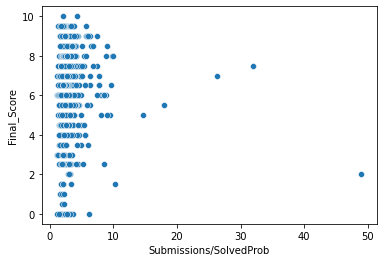

In [209]:

sns.scatterplot(x="Submissions/SolvedProb", y="Final_Score", data=plott)

**Tỉ lệ % hoàn thành 1 problem**

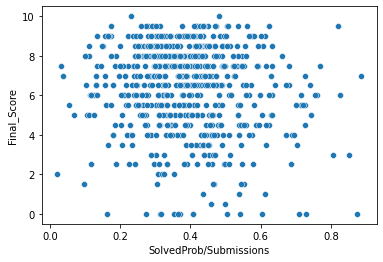

In [210]:
sns.scatterplot(x="SolvedProb/Submissions", y="Final_Score", data=plott)

**Tổng số submit đúng**

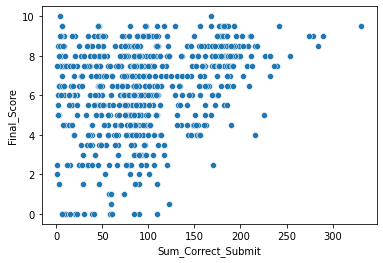

In [211]:
sns.scatterplot(x="Sum_Correct_Submit", y="Final_Score", data=plott)

**Tổng pre_score của các submission có is_final = 1**

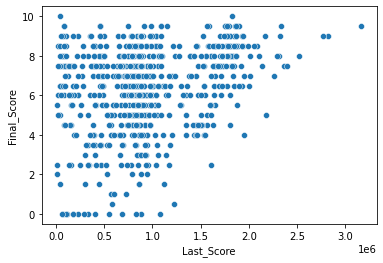

In [212]:
sns.scatterplot(x="Last_Score", y="Final_Score", data=plott)

**Tổng submissions**

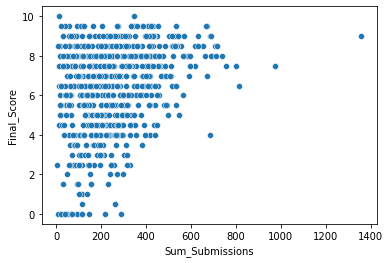

In [213]:
sns.scatterplot(x="Sum_Submissions", y="Final_Score", data=plott)

**Tỉ lệ nộp bài đúng trên tổng số bài đã nộp**

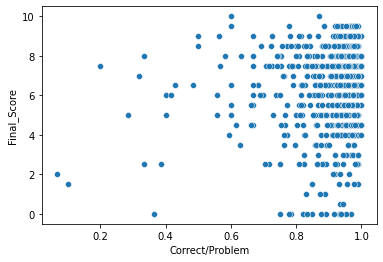

In [214]:
a = {}
a['Correct/Problem'] = final['Sum_Problems_solved'] / final['Sum_Prob'] 
a['Final_Score'] = final['Final_Score']

sns.scatterplot(x="Correct/Problem", y="Final_Score", data=a)

# **TRAIN, TEST DATA**

In [244]:
data_train = final.copy()
CK = data_train['Final_Score']
data_train.drop(columns=['Final_Score','user_id'],inplace = True)
X_train, X_test, y_train, y_test = train_test_split(data_train, CK, train_size=0.8, random_state=10)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539 entries, 122 to 347
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sum_Submissions         539 non-null    int64  
 1   Sum_Prob                539 non-null    int64  
 2   Sum_Problems_solved     539 non-null    int64  
 3   Sum_Correct_Submit      539 non-null    int64  
 4   Last_Score              539 non-null    float64
 5   Submissions/SolvedProb  539 non-null    float64
 6   SolvedProb/Submissions  539 non-null    float64
 7   TH                      539 non-null    float64
 8   QT                      539 non-null    float64
 9   GK                      539 non-null    float64
dtypes: float64(6), int64(4)
memory usage: 46.3 KB


In [245]:
y_train

122    9.5
568    6.5
612    4.0
84     6.5
850    1.5
      ... 
499    6.0
437    8.0
692    8.5
155    4.5
347    6.0
Name: Final_Score, Length: 539, dtype: float64

In [246]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [247]:
y_pre = model.predict(X_test)
mse = mean_squared_error(y_pre, y_test)

print(f'MSE: {mse}')

MSE: 2.372635424674783


**NHẬN XÉT**

-Qua nhiều thử nghiệm với các feature khác nhau nhóm em chỉ có thể tối ưu hóa mse ở mức 2.46 

-Dữ liệu sau khi lọc ra còn lại khá ít để chia train/test hợp lý
